### 1. Objective

The objective of this notebook is to clean up the data before further inferential statistical analysis and data modeling. The steps include checking missing values and outliers, examining variable types and encoding.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load data and data conversion

There are **?** in the data set. Those values will be converted to NaN (missing values). In `gender`, there are **Unknown/Invalid** values which will be converted to NaN too.

In [2]:
df = pd.read_csv('./data/diabetic_data.csv', header=0, index_col=0)

# Replace “?” and “Unknown/Invalid” with NaN
replace_values = {'?': np.nan,
                 'Unknown/Invalid': np.nan}
df.replace(replace_values, inplace=True)

df.shape

(101766, 49)

In [3]:
df.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [4]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 2278392 to 443867222
Data columns (total 49 columns):
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101763 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      1

### 3. Re-label the responsive variable

The current responsive variable 'readmitted' has 3 categories: `<30`, `>30` and `NO`. This study is interested in those patients that are readmitted within 30 days after discharge. Then, the `<30` category was coded as 1, other two categories were coded as 0. 

In [6]:
# count the number of rows for each readmitted type
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [7]:
# create a new variable LABEL
df['LABEL'] = (df.readmitted == '<30').astype('int')
df.drop('readmitted', axis=1, inplace=True)

In [8]:
df.LABEL.sum()

11357

### 4. Check missing values

Check the percentage of missing values for each variable and observation. Three variables have `>39%` missing values: `weight`, `medical_specialty` and `payer_code`. Other variables have `<3%` missing values. The variable `weight` with `>50%` missing values were dropped. Before dropping variables, the highest percentage of missing values in observations is `10%`. This number decreases to `8%` after dropping variables. Currently keep the observations with missing values.

In [9]:
# check missing values in columns
(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)[:10]

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
gender                0.002948
LABEL                 0.000000
number_outpatient     0.000000
dtype: float64

In [10]:
# check missing values in rows
(df.isnull().sum(axis=1)*100/df.shape[1]).sort_values(ascending=False)[:30]

encounter_id
23184132     10.204082
252416532    10.204082
173745300    10.204082
80179764     10.204082
147633402    10.204082
81345354     10.204082
97135860     10.204082
60049710     10.204082
38225280     10.204082
17844570     10.204082
34400322     10.204082
142076808    10.204082
14056032     10.204082
40869666     10.204082
715086       10.204082
57492246     10.204082
83277900     10.204082
83243016     10.204082
146991852    10.204082
81015228     10.204082
48795570     10.204082
277875756    10.204082
82029858     10.204082
103981296    10.204082
56000970     10.204082
59274324     10.204082
32253420     10.204082
158348244    10.204082
207474240     8.163265
51999162      8.163265
dtype: float64

In [11]:
# dropping columns with high NA percentage (>30%)
df.drop(['weight'], axis=1, inplace=True)

In [12]:
# check missing values in rows after dropping columns
(df.isnull().sum(axis=1)*100/df.shape[1]).sort_values(ascending=False)[:20]

encounter_id
83277900     8.333333
34400322     8.333333
715086       8.333333
23184132     8.333333
80179764     8.333333
173745300    8.333333
81015228     8.333333
81345354     8.333333
82029858     8.333333
60049710     8.333333
83243016     8.333333
32253420     8.333333
59274324     8.333333
277875756    8.333333
158348244    8.333333
17844570     8.333333
57492246     8.333333
56000970     8.333333
54786702     8.333333
97135860     8.333333
dtype: float64

In [13]:
df.shape

(101766, 48)

### 5. Check outliers (numerical variables)

There are 8 numerical varaibles that will be check for outliers. There are no missing values but there are outliers in those 8 variables according to the boxplot of each numerical variable. Currently keep all those outliers in each variable

In [14]:
vars_num = ['time_in_hospital', 'num_procedures', 'number_diagnoses', 'num_medications', 
            'number_outpatient', 'number_inpatient','number_emergency', 'num_lab_procedures']

In [15]:
# there are no missing values in those 8 numerical varialbes
df[vars_num].isnull().sum()

time_in_hospital      0
num_procedures        0
number_diagnoses      0
num_medications       0
number_outpatient     0
number_inpatient      0
number_emergency      0
num_lab_procedures    0
dtype: int64

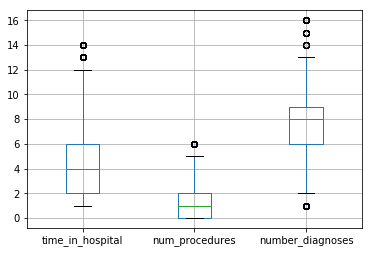

In [16]:
bp = df.boxplot(column=['time_in_hospital', 'num_procedures', 'number_diagnoses'])

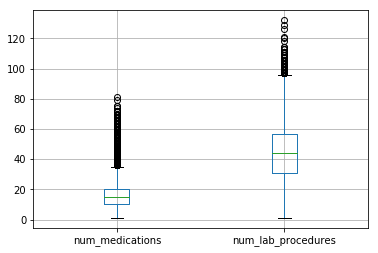

In [17]:
bp = df.boxplot(column = ['num_medications', 'num_lab_procedures'])

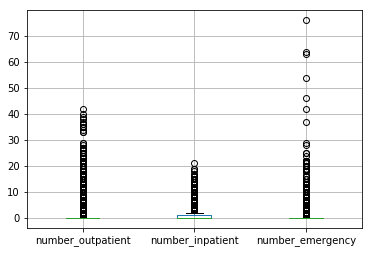

In [18]:
bp = df.boxplot(column = ['number_outpatient', 'number_inpatient','number_emergency'])

### 6. Examine categorical variables

There are several types of categorical variables:
 - `race`, `gender`, `age`. Those are basic demographic information.
 - `admission_type_id`, `discharge_disposition_id`, `admission_source_id` are numerical but they are IDs and should be treated as categorical.
 - `payer_code`, `medical_specialty`. They are insurance/payment information and admitting physicians' specialties.
 - `diag_1`, `diag_2`, `diag_3` have several hundred distinct values. Those could be dropped for analysis. Those diagnose information are partly captured in numerical variable `number_diagnoses`.
 - `max_glu_serum`, `A1Cresult`. Special lab test results.
 - 23 generic medications and a special one `diabetesMed`. `change` is a binary variable indicating whether there was a change in diabetic medications (either dosage or generic name).

`age` is a categorical variable but in order. It is better to covert it to numerical variable.

In [19]:
df['age'] = df['age'].str[1:].str.split('-', expand=True)[0]
df['age'] = df['age'].astype(int)

In [20]:
# convert numerical varialbes to categorical variable
df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']] = df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']].astype('object')

In [21]:
vars_cat = df.columns.values[(df.dtypes == 'object').values]

In [22]:
def get_cat_levels(col):
    return pd.DataFrame({'Variable': [col], 'Levels': [len(df[col].unique())]})

In [23]:
# lsit of categorical variables and their number of levels
pd.concat(map(get_cat_levels, vars_cat))

,Variable,Levels
0,race,6
0,gender,3
0,admission_type_id,8
0,discharge_disposition_id,26
0,admission_source_id,17
0,payer_code,18
0,medical_specialty,73
0,diag_1,717
0,diag_2,749
0,diag_3,790


In [24]:
# drop variables with only 1 level and variables with > 50 levels
df.drop(['medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'examide', 'citoglipton'], axis=1, inplace=True)

In [25]:
vars_cat = list(df.columns.values[(df.dtypes == 'object').values])

In [26]:
# one hot encoding
final = pd.get_dummies(df, columns = vars_cat, drop_first = True)

In [27]:
final.shape

(101766, 136)

### 7. Summary

The final cleaned data set has 136 variables:
 - 9 numerical variables
 - 125 categorical varialbes
 - one patient number variable
 - one response variable

In [28]:
file_name = 'data/diabetic_data_clean.csv'
final.to_csv(file_name)